# Visualisation des données de loyers leboncoin

## Importations

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import statsmodels.api as sm


## Vue d'ensemble

In [24]:
data = pd.read_csv('../../data/rent_full.csv',sep=";")
data['prix_m2'] = data['price'] / data['surface']
data = data[data['price'] < 1500]
data.describe() 

list_id       zipcode   district_id        price  \
count  2.346000e+03   2346.000000  2.283000e+03  2346.000000   
mean   2.947582e+09  75017.026428  1.968510e+06  1045.123188   
std    4.093305e+07     18.564270  1.391611e+06   248.176926   
min    1.950691e+09  75001.000000  7.510100e+04   500.000000   
25%    2.927370e+09  75011.000000  1.004700e+05   850.000000   
50%    2.945674e+09  75015.000000  3.000141e+06  1025.000000   
75%    2.978764e+09  75018.000000  3.000199e+06  1250.000000   
max    2.988740e+09  75116.000000  3.001906e+06  1499.000000   

       charges_included    furnished      surface     price_m2     nb_rooms  \
count            2346.0  2302.000000  2211.000000  2211.000000  2251.000000   
mean                1.0     1.211121    24.671190    48.052138     1.321191   
std                 0.0     0.408193    12.324459    26.523885     0.725650   
min                 1.0     1.000000     1.000000     2.187500     1.000000   
25%                 1.0     1.000000    17.000000    37.703297     1.000000   
50%                 1.0     1.000000    23.000000    43.703704     1.000000   
75%                 1.0     1.000000    31.000000    54.318182     2.000000   
max                 1.0     2.000000   320.000000  1065.000000    23.000000   

       nb_bedrooms  nb_bathrooms  floor_number  floor_building     elevator  \
count  1276.000000   1355.000000   1671.000000     1052.000000  1546.000000   
mean      1.097962      1.010332      3.317175        5.862167     1.500647   
std       0.453963      0.230367      2.951900        3.123986     0.500161   
min       1.000000      1.000000      0.000000        1.000000     1.000000   
25%       1.000000      1.000000      1.000000        5.000000     1.000000   
50%       1.000000      1.000000      3.000000        6.000000     2.000000   
75%       1.000000      1.000000      5.000000        6.000000     2.000000   
max       5.000000      9.000000     31.000000       33.000000     2.000000   

          parking  building_year  security_deposit     latitude    longitude  \
count  303.000000     850.000000       1737.000000  2346.000000  2346.000000   
mean     0.178218    1928.895294       1501.553253    48.860819     2.339258   
std      0.400233      52.147246       2128.645897     0.021679     0.039565   
min      0.000000    1350.000000          1.000000    48.816578     2.229434   
25%      0.000000    1900.000000        950.000000    48.841732     2.309934   
50%      0.000000    1930.000000       1300.000000    48.861194     2.340916   
75%      0.000000    1968.000000       1914.000000    48.880280     2.368856   
max      2.000000    2025.000000      85393.000000    48.901686     2.463227   

           prix_m2  
count  2211.000000  
mean     48.052138  
std      26.523885  
min       2.187500  
25%      37.703297  
50%      43.703704  
75%      54.318182  
max    1065.000000

## Relations entre toutes les paires de variables

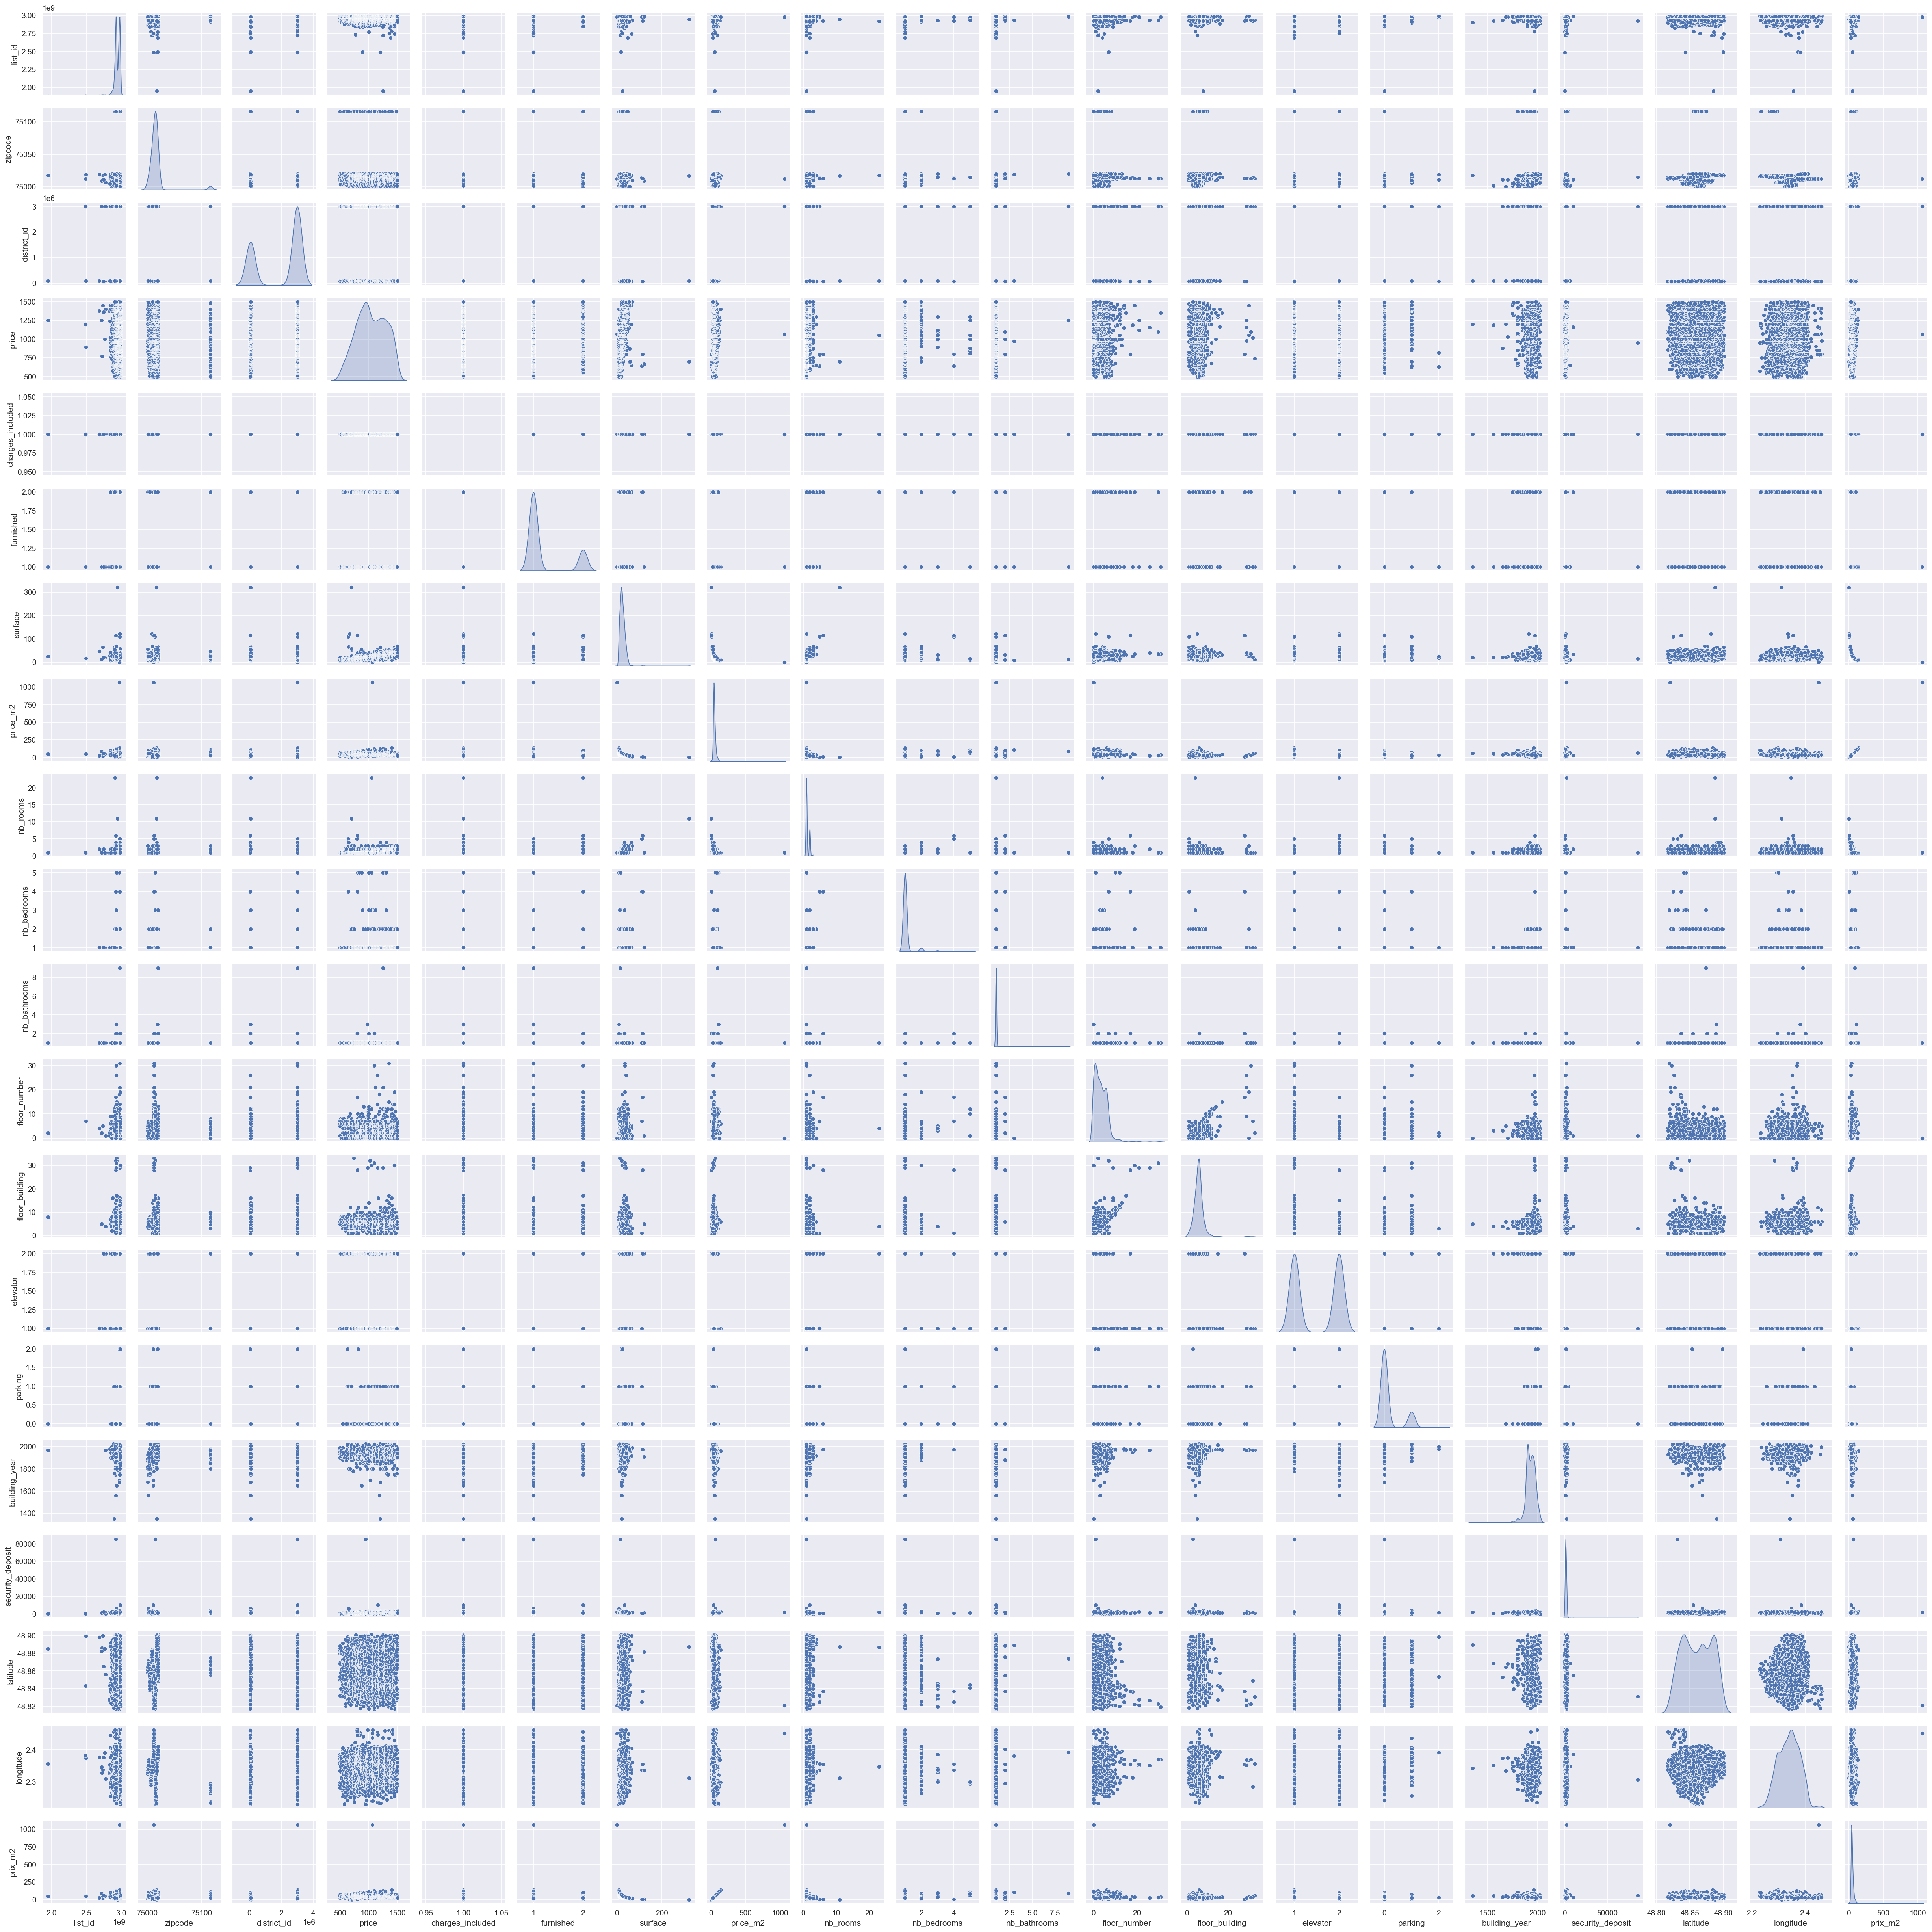

In [25]:
sns.pairplot(data, diag_kind="kde", height=2)  # "kde" pour un histogramme lissé
plt.show()

## Matrice de Correlation

price  nb_rooms  surface    prix_m2  parking
0      500.0       1.0     11.0  45.454545      NaN
1      500.0       1.0     10.0  50.000000      NaN
2      500.0       1.0     15.0  33.333333      NaN
3      500.0       1.0     10.0  50.000000      NaN
4      500.0       1.0     18.0  27.777778      NaN
...      ...       ...      ...        ...      ...
3083  1494.0       2.0     43.0  34.744186      NaN
3084  1495.0       2.0     35.0  42.714286      0.0
3085  1495.0       2.0     42.0  35.595238      NaN
3086  1496.0       3.0     69.0  21.681159      1.0
3087  1499.0       2.0     55.0  27.254545      1.0

[2346 rows x 5 columns]

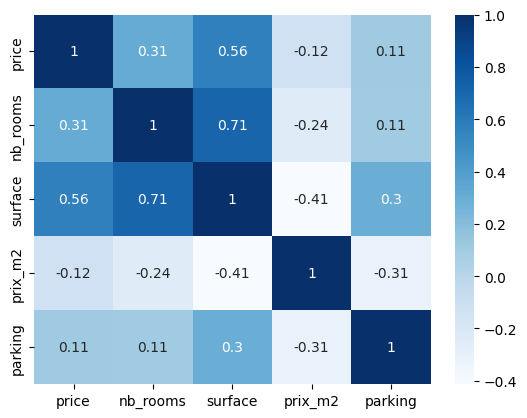

In [ ]:
#[ETUD]
data2 = data[['price','nb_rooms','surface','prix_m2','parking']]
MatCorr = data2.corr()
sns.heatmap(MatCorr, annot=True,cmap="Blues")

data2

## Analyse en composantes principales

/var/folders/1n/y44nm8wn4d7_c007zc7xn_hh0000gn/T/ipykernel_93559/366385334.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




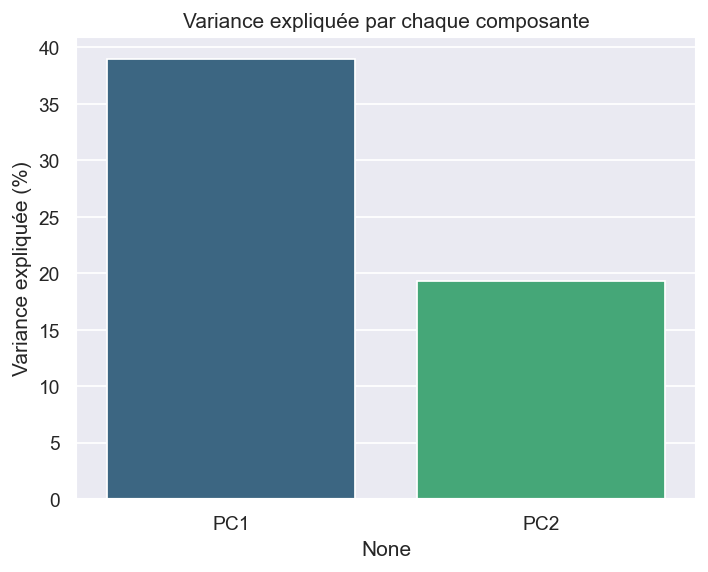

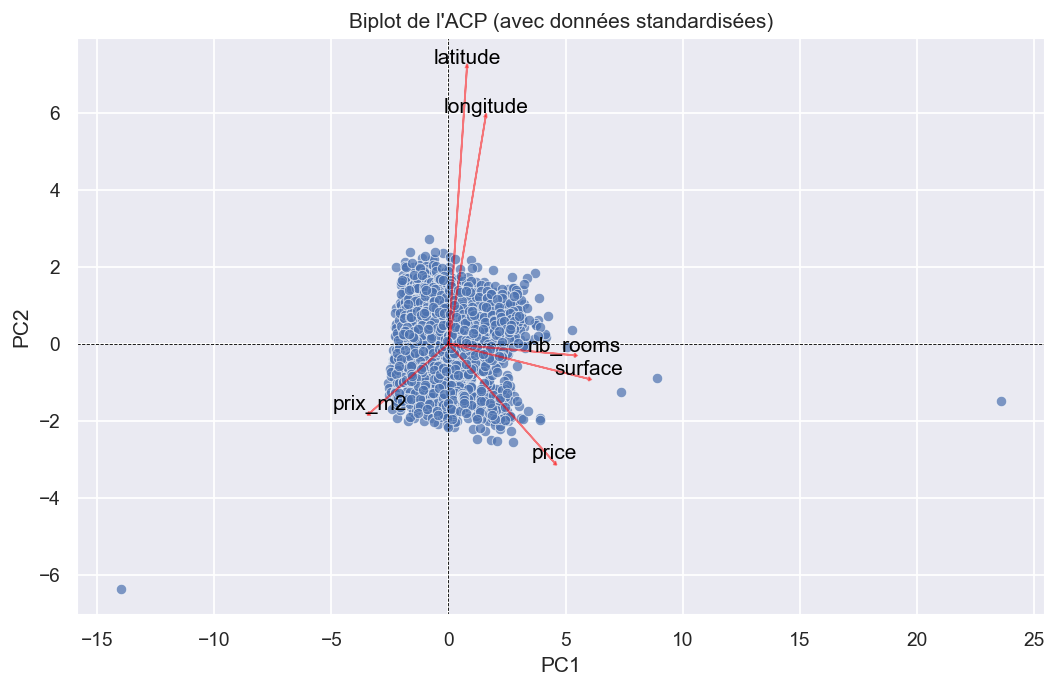

In [37]:
data3 = data[['longitude','latitude','surface','price','prix_m2','nb_rooms']]
data3 = data3.dropna()

# Normaliser les données avant la PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data3)  # Transforme en numpy array

# PCA avec les données normalisées
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data_pca = pd.DataFrame(data_pca, columns=["PC1", "PC2"])

# Extraire les composantes pour le biplot
loadings = pd.DataFrame(pca.components_.T, index=data3.columns, columns=["PC1", "PC2"])

# Afficher la variance expliquée
sns.barplot(x=loadings.columns, y=pca.explained_variance_ratio_ * 100, palette="viridis")
plt.ylabel("Variance expliquée (%)")
plt.title("Variance expliquée par chaque composante")
plt.show()

# Tracer le biplot avec les flèches
fig, ax = plt.subplots(figsize=(10, 6))

# Nuage de points des individus
sns.scatterplot(data=data_pca, x="PC1", y="PC2", alpha=0.7, ax=ax)

scale_factor = 10  # Ajuster ce facteur pour mieux voir les flèches
for feature, (x, y) in loadings.iterrows():
    ax.arrow(0, 0, scale_factor * x, scale_factor * y, 
             color='red', alpha=0.5, head_width=0.1, head_length=0.1)
    ax.text(scale_factor * x, scale_factor * y, feature, 
            color='black', fontsize=12, ha="center", va="bottom")

# Ajouter des axes et un titre
ax.axhline(0, color="black", linestyle="--", linewidth=0.5)
ax.axvline(0, color="black", linestyle="--", linewidth=0.5)
ax.set_title("Biplot de l'ACP (avec données standardisées)")

plt.show()

## Cercle de corrélation

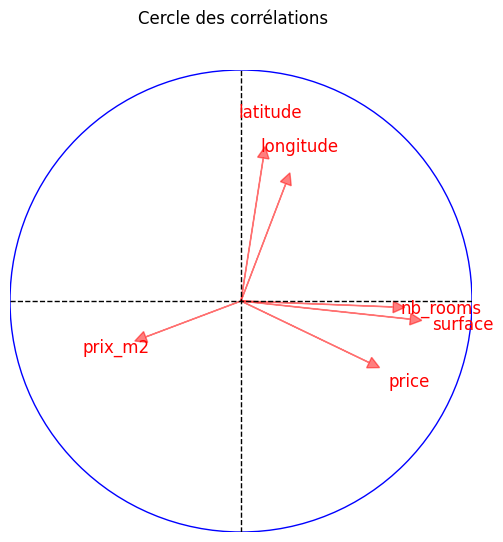

In [ ]:
n = data_pca.shape[0]  # Nombre d'individus
p = data_pca.shape[1]  # Nombre de composantes principales
p_original = data3.shape[1]  # Nombre de variables initiales

# Calcul des valeurs propres
eigval = (n-1) / n * pca.explained_variance_
sqrt_eigval = np.sqrt(eigval)

# Correction de la taille de la matrice
corvar = np.zeros((p_original, p))

# Calcul des coordonnées des variables
for k in range(p):
    corvar[:, k] = pca.components_[k, :] * sqrt_eigval[k]

# Création d'un DataFrame avec les coordonnées des variables
coordvar = pd.DataFrame({
    'id': data3.columns,  # Noms des variables initiales
    'COR_1': corvar[:, 0],
    'COR_2': corvar[:, 1]
})

coordvar
plt.style.use('default') 
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize=(6,6))
fig.suptitle("Cercle des corrélations")

# Définition des limites des axes
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# Ajout des axes
axes.axvline(x=0, color='black', linestyle='--', linewidth=1)
axes.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Ajout des noms des variables avec un facteur d'échelle pour la lisibilité
scale = 0.8  # Ajuste ce facteur si besoin
for j in range(len(coordvar)):
    x, y = coordvar["COR_1"][j], coordvar["COR_2"][j]
    axes.arrow(0, 0, x* scale, y* scale, color='red', alpha=0.5, 
               head_width=0.05, head_length=0.05)  # Ajout des flèches
    axes.text(x * (scale+0.25), y * (scale+0.25), coordvar["id"][j], color='red', 
              fontsize=12, ha="center", va="center")  # Ajout du texte

# Ajout du cercle unité
cercle = plt.Circle((0, 0), 1, color='blue', fill=False)
axes.add_patch(cercle)

# Aspect carré pour un cercle bien rond
axes.set_aspect('equal')
plt.axis('off')
plt.show()

## Clustering (par K-Means)

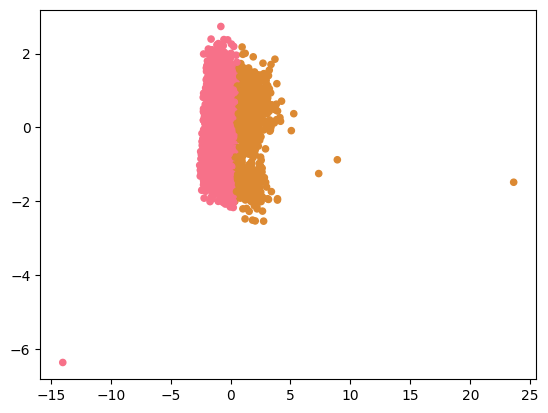

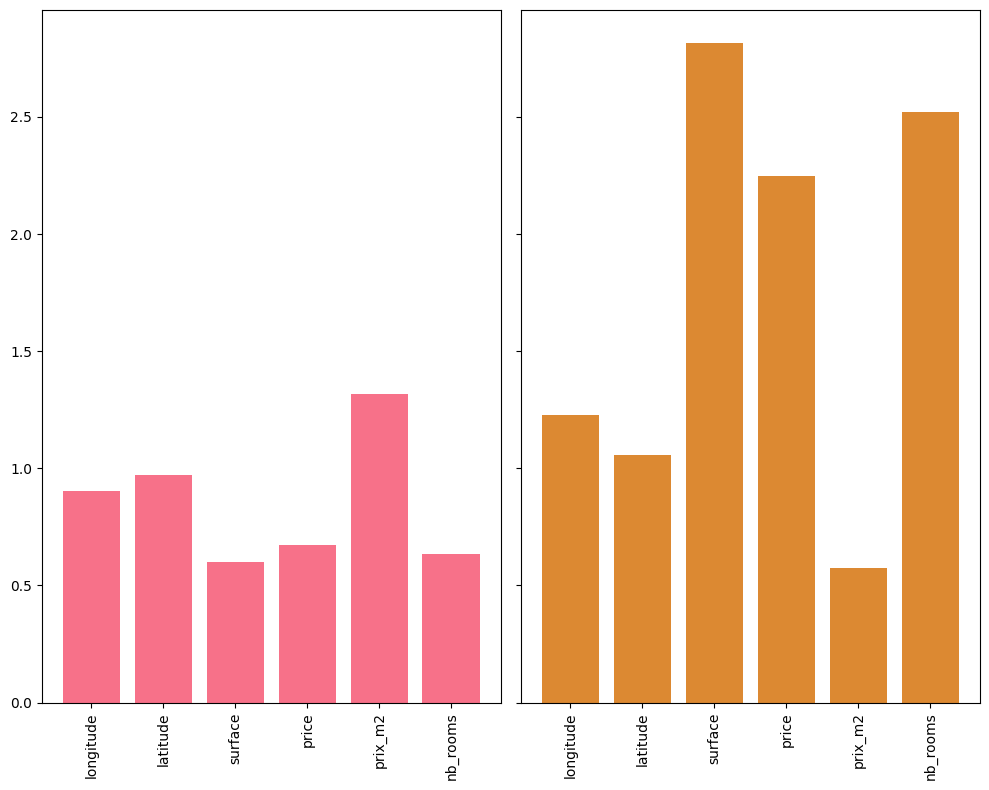

In [ ]:
# Palette de couleurs avec 10 couleurs
palette10 = sns.color_palette('husl', 10)
n= 2
# K-Means 
km = KMeans(n_clusters=n, random_state=42)
pred = km.fit_predict(data_pca)

#accès aux colonnes
plt.scatter(data_pca.iloc[:, 0], data_pca.iloc[:, 1], color=[palette10[pred[i]] for i in range(len(data_pca))], s=20)
plt.savefig('../../images/cluster1.png',transparent=True, dpi=300)
#calcul des centres
real_centers = np.exp(pca.inverse_transform(km.cluster_centers_))

# subplots
fig, axs = plt.subplots(km.n_clusters // n, n, figsize=(10, 8), sharey=True, sharex=True)

for i, k in enumerate(real_centers):
    axs.flatten()[i].bar(range(len(k)), k, color=palette10[i])
    axs.flatten()[i].set_xticks(range(len(k)))
    axs.flatten()[i].set_xticklabels(data3.columns, rotation="vertical")

plt.tight_layout()

plt.show()

### Affichage des éléments des deux clusters sur la carte de paris

In [89]:
import folium
# data_not_nan = 
# Ajouter les clusters au DataFrame
data3['cluster'] = pred  # Ajouter les prédictions des clusters au DataFrame

# Créer une carte centrée sur Paris
map_clusters = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

# Définir des couleurs pour les clusters
colors = ['blue', 'red']  # Une couleur par cluster

# Ajouter les points des appartements à la carte
for _, row in data3.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=1,
        color=colors[int(row['cluster'])],
        fill=True,
        fill_color=colors[int(row['cluster'])],
        fill_opacity=0.7,
    ).add_to(map_clusters)

# Afficher la carte
map_clusters

#### Loyer moyen par cluster

In [88]:
cluster_means = data3.groupby('cluster')['price'].mean()
print(cluster_means)

cluster
0     938.517100
1    1280.293463
Name: price, dtype: float64


## Nombre d'appartements par taille pour prix $\in [500,1500]$

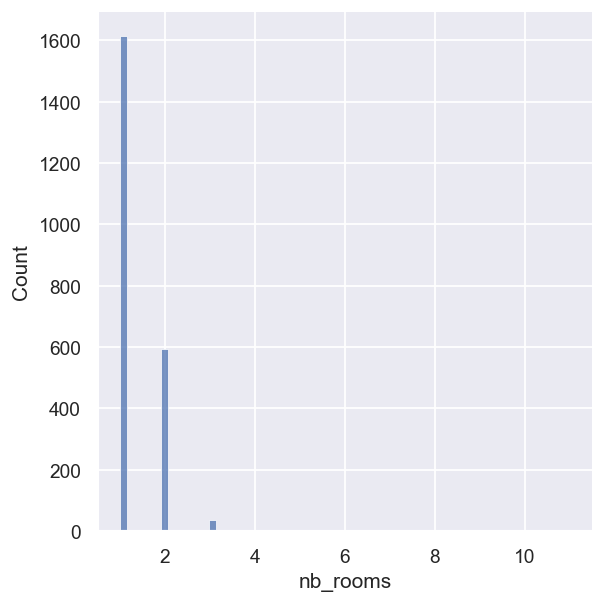

In [45]:
data_pieces = data['nb_rooms'].dropna().astype(int)
data_piecesdf = pd.DataFrame(data_pieces, columns=["nb_rooms"])
data_piecesdf = data_piecesdf[~data_piecesdf["nb_rooms"].isin([23])]
sns.set_theme(rc={"figure.dpi": 125})  
sns.set_style(style="darkgrid")
sns.displot(data_piecesdf, x="nb_rooms", fill=True, edgecolor="white")
plt.show()
data_pieces = data_pieces.unique()


## Heatmap - Density mapbox

In [32]:
import plotly.graph_objects as go

# Créer une heatmap avec Densitymapbox
fig = go.Figure(go.Densitymapbox(
    lon=data["longitude"],
    lat=data["latitude"],
    z=data["prix_m2"],  # Valeurs à afficher
    radius=20,  # Taille des points
    colorscale="Viridis",  # Choisir la palette de couleurs
    colorbar_title="Prix au m²",  # Titre de la barre de couleurs
))

# Configurer la carte
fig.update_geos(
    center=dict(lat=48.8566, lon=2.3522),  # Centre de la carte (Paris)
    projection_type="mercator",
    visible=False
)

# Ajouter un titre
fig.update_layout(
    title="Heatmap des prix au m² des logements à Paris",
    mapbox_style="open-street-map",  # Style sans besoin de token Mapbox
    mapbox_center={"lat": 48.8566, "lon": 2.3522},  # Centrer sur Paris
    mapbox_zoom=11,  # Zoom sur Paris
        width=800,  # Largeur de la carte (en pixels)
    height=600,  # Hauteur de la carte (en pixels)
)

# Afficher la c

- À notre grand étonnement, on remarque que c'est plutôt dans le 15e arrondissement qu'il y a les logements les plus chers.

## Universités et Ecoles à paris

In [10]:
ecoles_paris = pd.read_csv('../data/ecoles_paris.csv')
# Afficher le résultat
ecoles_paris
# ecoles

identifiant interne                                            libellé  \
0                Hq9dm  École nationale supérieure de création industr...   
1                l4myZ                   Institut protestant de théologie   
2                XBZhH  École nationale supérieure des métiers de l'im...   
3                24vIz                    Institut national du patrimoine   
4                8bexp                               ESCP Business School   
5                jYUcF           Arts et Métiers Sciences et Technologies   
6                TWBzp                    Université Paris-Panthéon-Assas   
7                QeAil  Ecole Nationale Supérieure des Beaux-Arts de P...   
8                wp55m               IAE Paris - Sorbonne Business School   
9                15kV5  Institut national du sport, de l'expertise et ...   
10               1v4lV  Pôle supérieur d'enseignement artistique Paris...   
11               6Jl2q                      École spéciale d'architecture   
12               5Ic1n  École nationale supérieure d'architecture de P...   
13               UKEsZ   Facultés Libres de Philosophie et de Psychologie   
14               VAP7f         Institut supérieur d'électronique de Paris   
15               ZCW24  Conservatoire national supérieur de musique et...   
16               4C5vX  École supérieure d'informatique électronique a...   
17               bxPQe                                Sorbonne Université   
18               8k883             Université Sorbonne Nouvelle - Paris 3   
19               42F7G                               IPAG Business School   
20               VaJ52               Muséum national d'histoire naturelle   
21               cZd69       Groupe Institut catholique d'arts et métiers   
22               jKV15                      École centrale d'électronique   
23               4i3C4  École nationale supérieure d'architecture de P...   
24               FDijq              Institut national d'histoire de l'art   
25               PpsCQ               Université Paris sciences et lettres   
26               NgNNI  École nationale supérieure d'architecture de P...   
27               y52D7       École des hautes études en sciences sociales   
28               5cZyU                              Université Paris Cité   
29               gghMO                       Institut français de la mode   
30               MihlE  Institut national d'enseignement supérieur pou...   

              nom court      sigle type d'établissement  \
0    Ensci-Les Ateliers        NaN                École   
1                   IPT        NaN                École   
2              La Fémis        NaN                École   
3                   NaN        Inp                École   
4                   NaN       ESCP                École   
5       Arts et Métiers      ENSAM  Grand établissement   
6        Panthéon-Assas        NaN           Université   
7   Beaux-Arts de Paris      ENSBA                École   
8          IAE de Paris  IAE Paris                École   
9                   NaN      INSEP  Grand établissement   
10                PSPBB        NaN                École   
11                  NaN        ÉSA                École   
12               ENSAPM        NaN                École   
13                  IPC        IPC                École   
14                  NaN       ISEP                École   
15               CNSMDP        NaN                École   
16                  NaN      ESIEA                École   
17           Sorbonne U        NaN           Université   
18            Paris III        NaN           Université   
19                  NaN        NaN                École   
20                  NaN       MNHN  Grand établissement   
21          Groupe ICAM        NaN                École   
22                  ECE        NaN                École   
23              ENSAPLV        NaN                École   
24                  NaN       INHA  Grand établissement   
25  

## Carte des Université et écoles parisiennes

In [11]:
# Créer la carte avec Scattermapbox pour afficher les écoles
fig = go.Figure(go.Scattermapbox(
    lon=ecoles_paris["longitude"],
    lat=ecoles_paris["latitude"],
    mode="markers",  # Afficher les marqueurs et les textes
    text=ecoles_paris["libellé"],  # Ajouter le nom de chaque école comme label
    textposition="top right",  # Position du label par rapport aux points
    marker=dict(size=12, color="blue", opacity=0.7),  # Apparence des marqueurs
))

# Configurer la carte
fig.update_layout(
    title="Carte des Universités et écoles à Paris",
    mapbox_style="open-street-map",  # Style sans besoin de token Mapbox
    mapbox_center={"lat": 48.8566, "lon": 2.3522},  # Centrer sur Paris
    mapbox_zoom=11,  # Zoom sur Paris
    width=800,  # Largeur de la carte (en pixels)
    height=600,  # Hauteur de la carte (en pixels)
)

# Afficher la carte
fig.show()

### Le nombre d'établissements proches est il correlé au prix du loyer ?

In [57]:
import numpy as np
import pandas as pd

# Fonction pour calculer la distance géographique (Haversine)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Rayon de la Terre en kilomètres
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Initialiser une colonne pour le nombre d'écoles proches
data['nb_ecole_proches'] = 0

# Calculer le nombre d'écoles proches pour chaque appartement
for index, appartement in data.iterrows():
    lat_a, lon_a = appartement['latitude'], appartement['longitude']
    
    # Calculer la distance entre l'appartement et toutes les écoles
    distances = ecoles_paris.apply(
        lambda ecole: haversine(lat_a, lon_a, ecole['latitude'], ecole['longitude']), axis=1
    )
    
    # Compter les écoles à moins de 1 km
    nb_proches = (distances <= 1).sum()
    data.at[index, 'nb_ecole_proches'] = nb_proches

# Afficher le DataFrame mis à jour
data[['latitude', 'longitude', 'nb_ecole_proches']]

latitude  longitude  nb_ecole_proches
0     48.869762   2.385954                 0
1     48.868400   2.281360                 1
2     48.849600   2.368360                 1
3     48.853420   2.297400                 1
4     48.882991   2.379849                 1
...         ...        ...               ...
3083  48.889940   2.350350                 1
3084  48.887070   2.346240                 1
3085  48.887460   2.347890                 1
3086  48.872420   2.360950                 0
3087  48.884635   2.373063                 0

[2346 rows x 3 columns]

#### Régression linéaire pour voir la correlation

In [60]:
X = data[['nb_ecole_proches']]  
X = sm.add_constant(X)  
y = data['price']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4526
Date:                Thu, 15 May 2025   Prob (F-statistic):              0.501
Time:                        08:05:31   Log-Likelihood:                -16264.
No. Observations:                2346   AIC:                         3.253e+04
Df Residuals:                    2344   BIC:                         3.254e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1042.8893      6.106  

In [61]:
data.describe()

list_id       zipcode   district_id        price  \
count  2.346000e+03   2346.000000  2.283000e+03  2346.000000   
mean   2.947582e+09  75017.026428  1.968510e+06  1045.123188   
std    4.093305e+07     18.564270  1.391611e+06   248.176926   
min    1.950691e+09  75001.000000  7.510100e+04   500.000000   
25%    2.927370e+09  75011.000000  1.004700e+05   850.000000   
50%    2.945674e+09  75015.000000  3.000141e+06  1025.000000   
75%    2.978764e+09  75018.000000  3.000199e+06  1250.000000   
max    2.988740e+09  75116.000000  3.001906e+06  1499.000000   

       charges_included    furnished      surface     price_m2     nb_rooms  \
count            2346.0  2302.000000  2211.000000  2211.000000  2251.000000   
mean                1.0     1.211121    24.671190    48.052138     1.321191   
std                 0.0     0.408193    12.324459    26.523885     0.725650   
min                 1.0     1.000000     1.000000     2.187500     1.000000   
25%                 1.0     1.000000    17.000000    37.703297     1.000000   
50%                 1.0     1.000000    23.000000    43.703704     1.000000   
75%                 1.0     1.000000    31.000000    54.318182     2.000000   
max                 1.0     2.000000   320.000000  1065.000000    23.000000   

       nb_bedrooms  ...  floor_number  floor_building     elevator  \
count  1276.000000  ...   1671.000000     1052.000000  1546.000000   
mean      1.097962  ...      3.317175        5.862167     1.500647   
std       0.453963  ...      2.951900        3.123986     0.500161   
min       1.000000  ...      0.000000        1.000000     1.000000   
25%       1.000000  ...      1.000000        5.000000     1.000000   
50%       1.000000  ...      3.000000        6.000000     2.000000   
75%       1.000000  ...      5.000000        6.000000     2.000000   
max       5.000000  ...     31.000000       33.000000     2.000000   

          parking  building_year  security_deposit     latitude    longitude  \
count  303.000000     850.000000       1737.000000  2346.000000  2346.000000   
mean     0.178218    1928.895294       1501.553253    48.860819     2.339258   
std      0.400233      52.147246       2128.645897     0.021679     0.039565   
min      0.000000    1350.000000          1.000000    48.816578     2.229434   
25%      0.000000    1900.000000        950.000000    48.841732     2.309934   
50%      0.000000    1930.000000       1300.000000    48.861194     2.340916   
75%      0.000000    1968.000000       1914.000000    48.880280     2.368856   
max      2.000000    2025.000000      85393.000000    48.901686     2.463227   

           prix_m2  nb_ecole_proches  
count  2211.000000       2346.000000  
mean     48.052138          0.793691  
std      26.523885          1.225206  
min       2.187500          0.000000  
25%      37.703297          0.000000  
50%      43.703704          0.000000  
75%      54.318182          1.000000  
max    1065.000000          7.000000  

[8 rows x 21 columns]

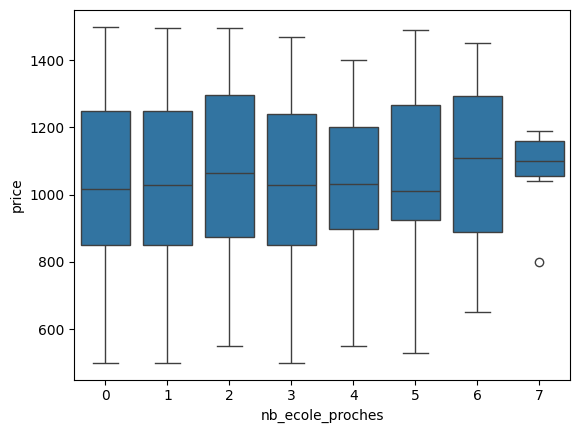

In [ ]:
# plt.figure()
sns.boxplot(x='nb_ecole_proches', y='price', data=data)
